Importing Dataset

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [229]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.shape

(30, 17)

Checking the null values:

In [230]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [231]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Dataframe Description:

The dataframe provides the statistics of a 30 different Baseball teams for 2014 season and on the basis of this data we have to have create a model which can predict the most probable number of wins for the next season. The dataset contains the data like:


R: Runs scored

AB: At Bat, means a batter's turn batting against a pitcher.

H: Hit

2B: Double, means the batter hits the ball and reaches second base.

3B: Triple , means the batter hits the ball and reaches third base.

BB: Base on balls

HR: Home Run

SO: Strikeout

SB: Stolen Base

RA:Run Average

ER: Earned Run

ERA: Earned Run Average

CG: Complete game

SHO:Shutout

SV: Save

E: Error

W: Number of wins


All the fields except W are our features and W is our target

 

Checking Datatype of the dataset

In [232]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the features and target are integer or float hence we dont need to change any datatype.

Correlation:

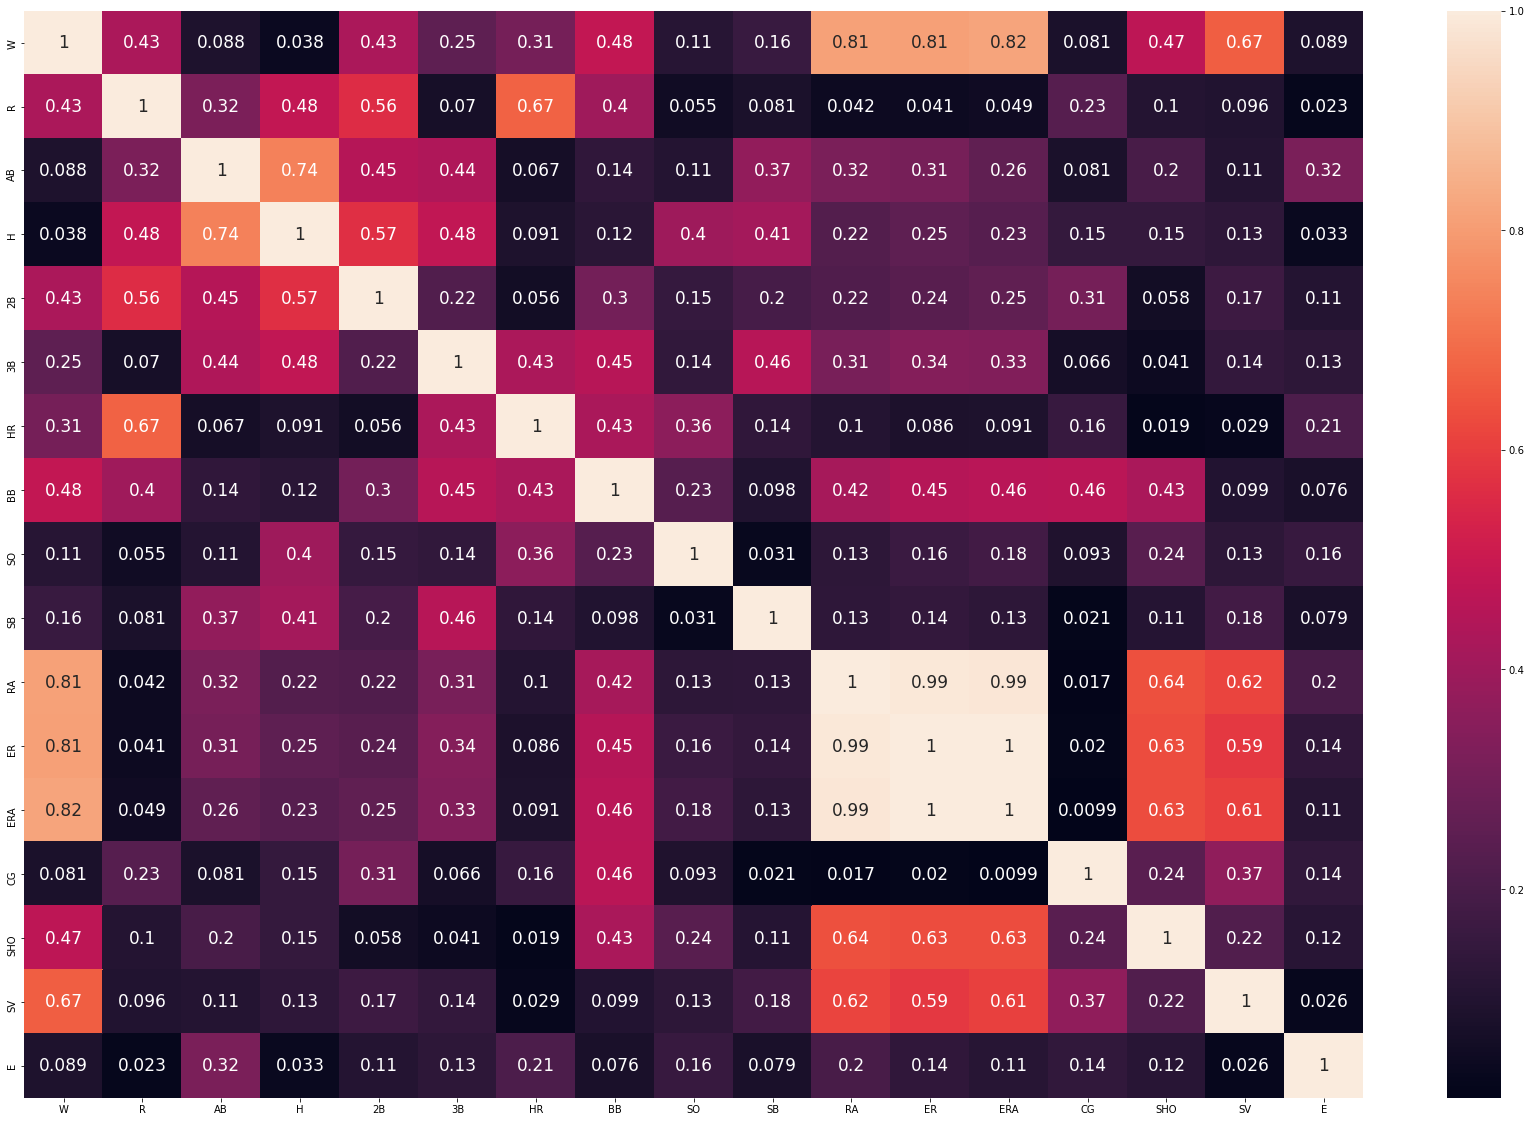

In [233]:
corr = df.corr().abs()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, annot_kws = {'size':17})
plt.show()

From the heatmap of correlation it is very clear that there is a strong bond between target i.e.'W' and features i.e. 'RA','ER','ERA' &'SV'. Also, it seems there is a multicolienarity between 'ERA' & 'RA' and 'ER' & 'RA'. Just to double check the multicolinearity, lets use variance inflation factor.

Variance Inflation Factor:

In [234]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [235]:
X = df.drop(columns = 'W', axis = 1)
Y = df['W']

In [236]:
scale = StandardScaler()
scaled_x = scale.fit_transform(X)

In [237]:
vif = pd.DataFrame()

In [238]:
vif['features'] = X.columns

In [239]:
vif['score'] = [variance_inflation_factor(scaled_x, i) for i in range(scaled_x.shape[1])]

In [240]:
vif

,features,score
0,R,11.522370
1,AB,13.311532
2,H,10.070668
3,2B,4.019297
4,3B,3.294146
5,HR,10.079902
6,BB,3.806098
7,SO,2.652401
8,SB,2.102684
9,RA,191.839155


From the above variance inflation factor analysis, it is confirmed that there is a multicolinearity between 'RA','ER',and 'ERA'. since, correlation co-efficient of 'R' with target i.e. 'W' less than 'ER' and ERA', hence we'll drop 'R' column from the feature in order to treat multicolinearity problem. 

Checking for Skewness:

In [241]:
X.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

 From the above observation it seems that we have some skewness with some of the features. Since acceptable skewnees range is -1 to +1, hence, 'R'column has some skewness. Hence, we need to treat this skewness.

In [242]:
X['R'] = np.log(X['R'])

In [243]:
X.skew()

R      0.744196
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Checking for Outliers:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

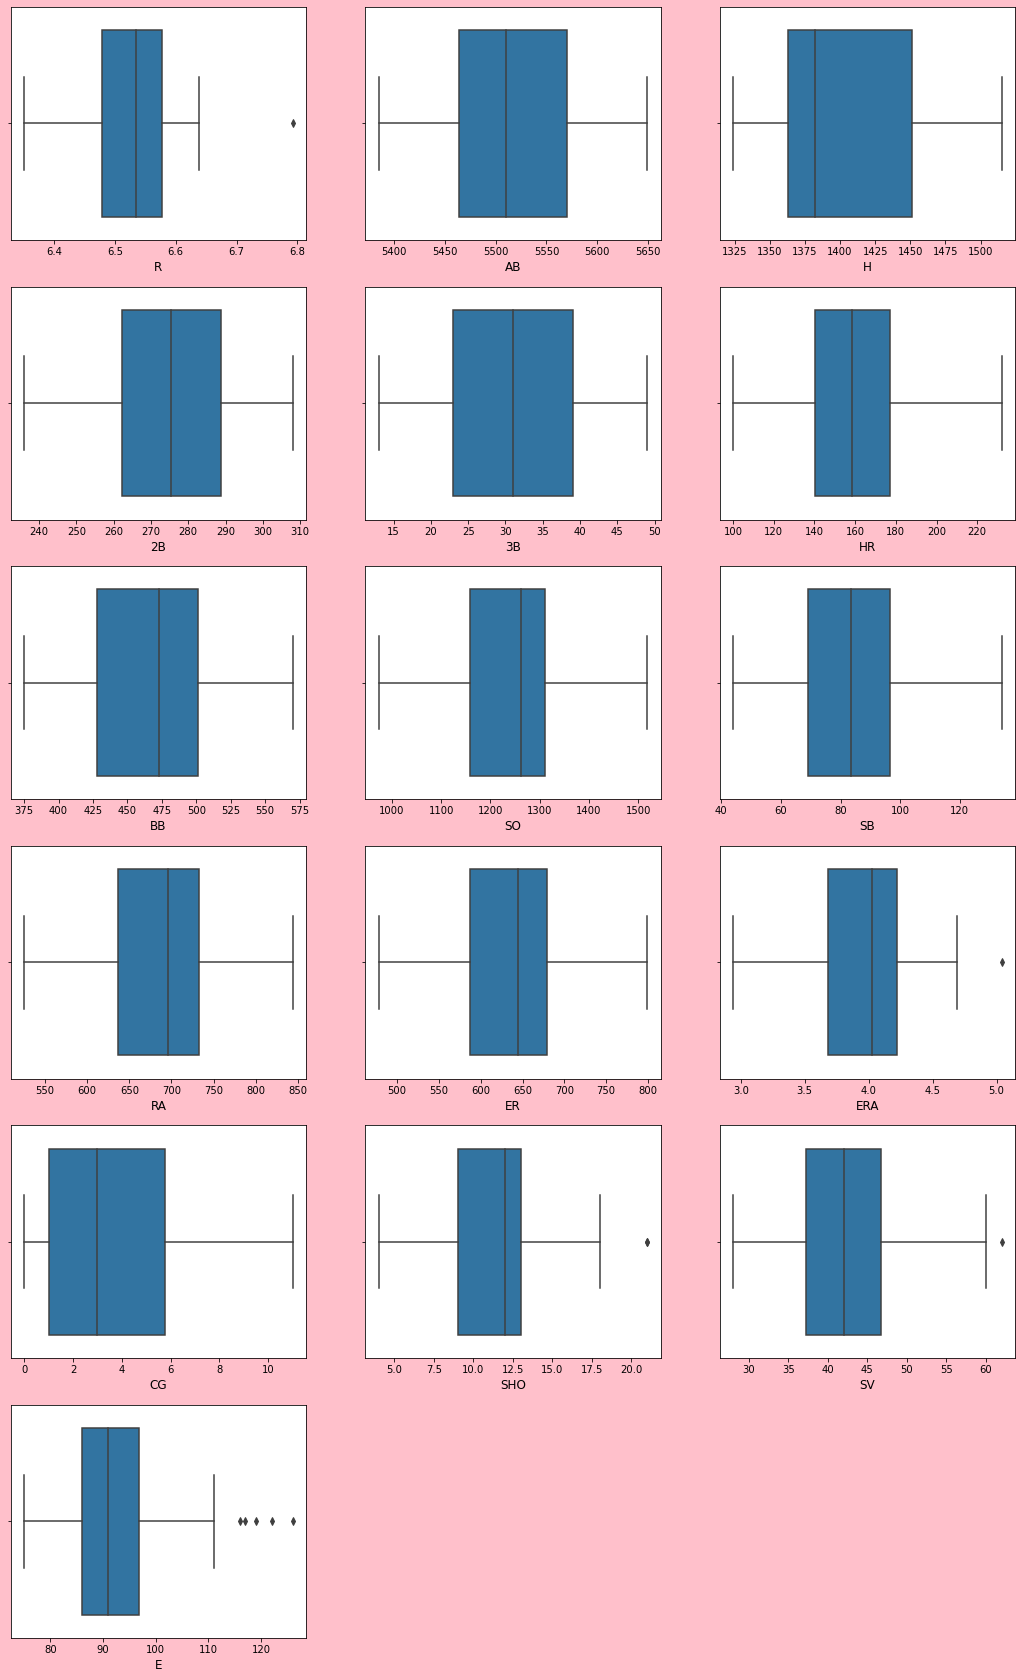

In [244]:
plt.figure(figsize = (18,30), facecolor = 'pink')
graph = 1

for column in X:
    if graph <= 20:
        plt.subplot(6,3, graph)
        sns.boxplot(X[column],orient='v')
        plt.xlabel(column, fontsize = 12,)
        
    graph+=1
    
plt.show()

It seems, that 4 features have a single outlier which can be ignored but 'E' feature have multiple outliers. But since we have a very small dataset i.e. only 30 rows, removing Outlier may cause loss of data.Hence, we need to work with outliers.

Defining Features & Target:

We need to define features again based on our EDA analysis. We need to remove 'R' from the list of features as there is multicolinearity problem with it.

In [249]:
X_New = df.drop(columns = ['R','W'], axis =1)
Y = df['W']

Scalling the Data using MinMax Scaler:

In [250]:
from sklearn.preprocessing import MinMaxScaler

In [251]:
scaler1 = MinMaxScaler()

In [252]:
X_scaled1 = scaler1.fit_transform(X_New)

Building a model:

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
svr = SVR()
rfr = RandomForestRegressor()
lr = LinearRegression()

In [301]:
for i in range(0,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scaled1,Y,test_size = 0.25, random_state=i)
    lr.fit(X_train,Y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    score_training = r2_score(Y_train,pred_train)
    
    score_test = r2_score(Y_test,pred_test)
    print(f"At random state {i}, training result is: {(score_training)*100:.2f}%")
    print(f"At random state {i}, test result is: {(score_test)*100:.2f}%")
    print("\n")

At random state 0, training result is: 93.46%
At random state 0, test result is: -75.50%


At random state 1, training result is: 96.14%
At random state 1, test result is: 18.04%


At random state 2, training result is: 99.23%
At random state 2, test result is: -115.31%


At random state 3, training result is: 96.02%
At random state 3, test result is: -24.55%


At random state 4, training result is: 90.10%
At random state 4, test result is: 41.70%


At random state 5, training result is: 91.01%
At random state 5, test result is: 71.62%


At random state 6, training result is: 90.10%
At random state 6, test result is: 48.54%


At random state 7, training result is: 95.06%
At random state 7, test result is: -2.95%


At random state 8, training result is: 89.47%
At random state 8, test result is: 81.77%


At random state 9, training result is: 87.13%
At random state 9, test result is: 78.84%


At random state 10, training result is: 91.59%
At random state 10, test result is: -46.03%


At 

Test Score is best at random state 8

In [303]:
X_train_new,X_test_new,Y_train_new,Y_test_new=train_test_split(X_scaled1,Y,test_size=0.25,random_state=8)
lr.fit(X_train_new,Y_train_new)

LinearRegression()

In [306]:
train_pred = lr.predict(X_train_new)
train_r2_score = r2_score(Y_train_new,train_pred)
print(f"Training result is: {(train_r2_score)*100:.2f}%")

Training result is: 89.47%


In [308]:
test_pred = lr.predict(X_test_new)
test_r2_score = r2_score(Y_test_new,test_pred)
print(f"Training result is: {(test_r2_score)*100:.2f}%")

Training result is: 81.77%


Cross Validation of the Model:

In [310]:
from sklearn.model_selection import cross_val_score

In [317]:
for j in range(2,10):
    cv_score = cross_val_score(lr,X_New,Y, cv=j)
    cv_mean = cv_score.mean()
    print(f"At CV {j}, the CV Score is {cv_mean} and accuracy score for training is {train_r2_score} while accuracy acore for testing is {test_r2_score}")
    print("\n")


At CV 2, the CV Score is -11.498868710425327 and accuracy score for training is 0.8947240142810547 while accuracy acore for testing is 0.8177481709672001


At CV 3, the CV Score is -4.95077192333495 and accuracy score for training is 0.8947240142810547 while accuracy acore for testing is 0.8177481709672001


At CV 4, the CV Score is -0.8657148103901985 and accuracy score for training is 0.8947240142810547 while accuracy acore for testing is 0.8177481709672001


At CV 5, the CV Score is -1.217510313102678 and accuracy score for training is 0.8947240142810547 while accuracy acore for testing is 0.8177481709672001


At CV 6, the CV Score is -0.5076503564630438 and accuracy score for training is 0.8947240142810547 while accuracy acore for testing is 0.8177481709672001


At CV 7, the CV Score is -0.6809050152175976 and accuracy score for training is 0.8947240142810547 while accuracy acore for testing is 0.8177481709672001


At CV 8, the CV Score is 0.023364323854625946 and accuracy score fo

Regularization:

In [320]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [328]:
parameters = {'alpha':[0.0001,0.001,.1,1,10], 'random_state': list(range(0,10))}
lasso = Lasso()
gsv = GridSearchCV(lasso,parameters)
gsv.fit(X_train_new,Y_train_new)
gsv.best_params_

{'alpha': 0.1, 'random_state': 0}

In [329]:
lasso = Lasso(alpha = 0.1, random_state = 0)

In [334]:
lasso.fit(X_train_new,Y_train_new)
lasso.score(X_train_new,Y_train_new)
pred_test1 = lasso.predict(X_test_new)

lasso_r2_score = r2_score(Y_test_new,pred_test1)
print(f"Lasso Test result is: {(lasso_r2_score)*100:.2f}%")

Lasso Test result is: 79.18%


In [338]:
lasso_cv = cross_val_score(lasso,X_New,Y)
lasso_cv_mean = lasso_cv.mean()
lasso_cv_mean

-0.8507923920399134

Ensemble Approch:

In [359]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
parameters1 = {'criterion':['mse','mae'], 'max_features': ['auto','sqrt','log2']}
gsv = GridSearchCV(rfr, parameters1)
gsv.fit(X_train_new,Y_train_new)
gsv.best_params_

{'criterion': 'mse', 'max_features': 'auto'}

In [382]:
rfr = RandomForestRegressor(criterion = 'mse', max_features = 'auto')
rfr.fit(X_train_new,Y_train_new)
pred_test4 = rfr.predict(X_test_new)
rfr_r2_score = r2_score(Y_test_new,pred_test4)
print(f"Random Forest Test result is: {(rfr_r2_score)*100:.2f}%")

Random Forest Test result is: 65.39%


In [383]:
lasso_cv = cross_val_score(rfr,X_New,Y)
lasso_cv_mean = lasso_cv.mean()
lasso_cv_mean

-0.7864461796115196

Saving the Model:

In [386]:
import pickle
filename = 'baseballdataset.pkl'
pickle.dump(lr,open(filename,'wb'))